In [1]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.stats as st
from scipy.spatial import distance
from sklearn.neighbors import KernelDensity

# Density estimation

In [2]:
ROOM_NUM = 1

with open(f'room_points_{ROOM_NUM}.npy', 'rb') as f:
    room_latent = np.load(f)

print(room_latent.shape)

room_pos = room_latent[:,:2]
print(room_pos.shape)

(10000, 4)
(10000, 2)


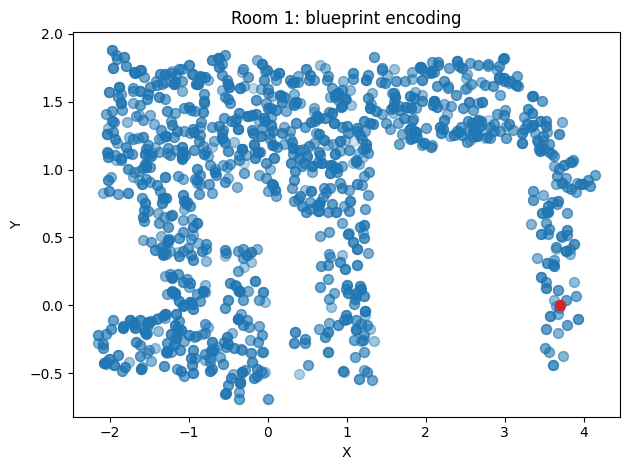

In [3]:
_ = plt.figure()
plt.scatter(room_pos[:,0], room_pos[:,1], color="tab:blue", s=50, alpha=.1)
plt.scatter([3.7], [0], color="tab:red", s=50)
plt.title(f"Room {ROOM_NUM}: blueprint encoding")
plt.xlabel('X')
plt.ylabel('Y')
plt.tight_layout()
plt.show()

(10000,) (100, 100)


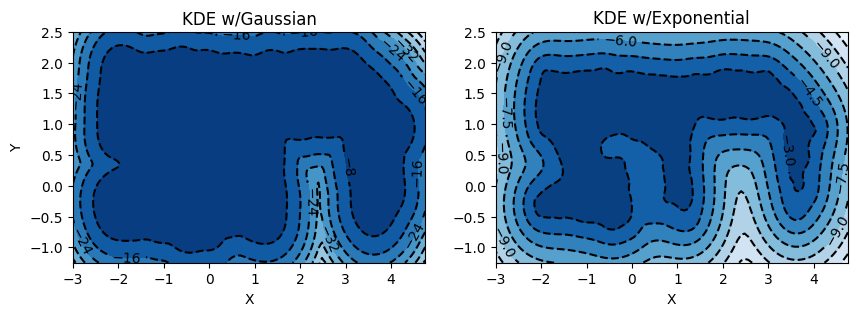

In [4]:
xmin, xmax = -3, 4.75
ymin, ymax = -1.25, 2.5

xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
print(xx.ravel().shape, yy.shape)
positions = np.vstack([xx.ravel(), yy.ravel()]).T


TARGET = np.array([[3.7, 0.0]])

BANDWIDTH = np.sqrt(0.02)

methods = ["gaussian", "exponential"]
fig, ax = plt.subplots(1, len(methods), figsize=(10, 3))

for idx, method in enumerate(methods):
    # Peform the kernel density estimate            
    kernel = KernelDensity(kernel=method, bandwidth=BANDWIDTH).fit(room_pos)

    kernel_val = np.reshape(kernel.score_samples(positions), xx.shape)
    
    ax[idx].set_xlim(xmin, xmax)
    ax[idx].set_ylim(ymin, ymax)
   
    # Contourf plot
    cfset = ax[idx].contourf(xx, yy, kernel_val, cmap="Blues")
    ## Or kernel density estimate plot instead of the contourf plot
    #ax.imshow(np.rot90(f), cmap='Blues', extent=[xmin, xmax, ymin, ymax])
    # Contour plot
    cset = ax[idx].contour(xx, yy, kernel_val, colors='k')
    ax[idx].clabel(cset, inline=1, fontsize=10)


    # Label plot
    ax[idx].set_xlabel('X')
    if idx == 0:
        ax[idx].set_ylabel('Y')
        
    ax[idx].set_title("KDE w/" + method.capitalize())

plt.show()

In [5]:
kernel = KernelDensity(kernel=method, bandwidth=BANDWIDTH).fit(room_pos)
kernel_val = kernel.score_samples(positions)

indices = np.where((-3.4<=kernel_val) & (kernel_val<=-3))
boundry = positions[indices]
boundry.shape

(677, 2)

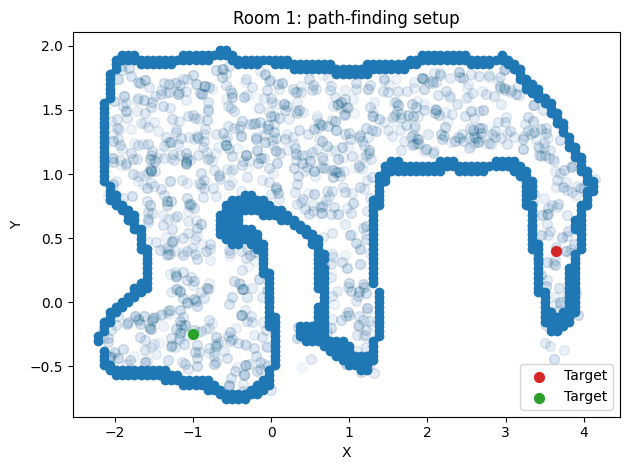

In [6]:
_ = plt.figure()
plt.scatter(room_pos[:,0], room_pos[:,1], color="tab:blue", s=50, alpha=.01)
plt.scatter(boundry[:,0], boundry[:,1], color="tab:blue")
plt.scatter([3.65], [0.4], color="tab:red", s=50, label="Target")
plt.scatter([-1], [-0.25], color="tab:green", s=50, label="Target")
plt.title(f"Room {ROOM_NUM}: path-finding setup")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.tight_layout()
plt.show()

In [7]:
cset.levels

array([-13.5, -12. , -10.5,  -9. ,  -7.5,  -6. ,  -4.5,  -3. ,  -1.5])

In [8]:
polys0 = cset.allsegs[-2]
x00, y00 = polys0[0].T

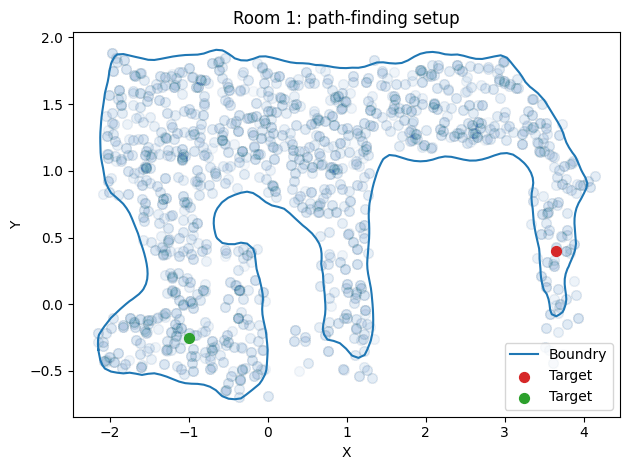

In [9]:
_ = plt.figure()
plt.scatter(room_pos[:,0], room_pos[:,1], color="tab:blue", s=50, alpha=.01)
plt.plot(x00, y00, color="tab:blue", label="Boundry")
plt.scatter([3.65], [0.4], color="tab:red", s=50, label="Target")
plt.scatter([-1], [-0.25], color="tab:green", s=50, label="Target")
plt.title(f"Room {ROOM_NUM}: path-finding setup")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
from HybridAStar.hybrid_a_star import *

print("Start Hybrid A* planning")

ox, oy = [], []

for i in range(60):
    ox.append(i)
    oy.append(0.0)
for i in range(60):
    ox.append(60.0)
    oy.append(i)
for i in range(61):
    ox.append(i)
    oy.append(60.0)
for i in range(61):
    ox.append(0.0)
    oy.append(i)
for i in range(40):
    ox.append(20.0)
    oy.append(i)
for i in range(40):
    ox.append(40.0)
    oy.append(60.0 - i)

# Set Initial parameters
start = [10.0, 10.0, np.deg2rad(90.0)]
goal = [50.0, 50.0, np.deg2rad(-90.0)]

print("start : ", start)
print("goal : ", goal)

if show_animation:
    plt.plot(ox, oy, ".k")
    rs.plot_arrow(start[0], start[1], start[2], fc='g')
    rs.plot_arrow(goal[0], goal[1], goal[2])

    plt.grid(True)
    plt.axis("equal")

path = hybrid_a_star_planning(
    start, goal, ox, oy, XY_GRID_RESOLUTION, YAW_GRID_RESOLUTION)

x = path.x_list
y = path.y_list
yaw = path.yaw_list

if show_animation:
    for i_x, i_y, i_yaw in zip(x, y, yaw):
        plt.cla()
        plt.plot(ox, oy, ".k")
        plt.plot(x, y, "-r", label="Hybrid A* path")
        plt.grid(True)
        plt.axis("equal")
        plot_car(i_x, i_y, i_yaw)
        plt.pause(0.0001)
        plt.close()

print(__file__ + " done!!")